# Equações de Lorenz

* PET – Física UFRN
* Petiano: Felipe Menescal Pinto de Medeiros
* Data: 19/08/2020

O objetivo deste projeto é desenvolver a teoria acerca das equações de Lorenz, discutir alguns pontos acerca do sistema descrito pelas equações e, por fim, resolvê-las numericamente usando Python.

Este problema foi proposto no livro Computational Physics (Mark Newman) no capítulo 8 (questão 8.3) e no livro Classical Mechanics, 5ª edição (Tom W.B. Kibble, Frank H. Berkshire) no capítulo 13.

Antes de iniciarmos com o desenvolvimento teórico, precisamos esclarecer um pequeno detalhe histórico. Na Física, existem as famosas transformações de Lorentz, desenvolvidas por Hendrik Lorentz (1853 - 1928), que descrevem a dilatação do tempo e contração do espaço na relatividade restrita. Há também a força de Lorentz, apresentada também por Hendrik Lorentz, que quantifica a força experienciada por uma carga elétrica q em um campo magnético B quando possui uma velocidade v. As equações de Lorenz que estamos prestes a estudar foram modeladas pelo meteorologista Edward Lorenz (1917 - 2008).

**MODELO ADOTADO**

As equações de Lorenz descrevem o comportamento dinâmico de um sistema meteorológico ideal simplificado: uma porção de fluido em movimento devido a diferenças de temperatura, viscosidade e volume. O objetivo do estudo destas equações por parte de Lorenz era descrever, pelo menos qualitativamente, o comportamento do clima. Essas equações são

\begin{align}
	\dot{x} &= \sigma (y-x)\\
	\dot{y} &= rx-y-xz\\
	\dot{z} &= -\beta +xy
\end{align}

Notação: $\dot{x}=dx/dt$.

Note que as equações de Lorenz formam um conjunto de três equações diferenciais ordinárias acopladas. O problema em questão pede para: (a) adotar os valores de $\sigma=10$, $r=28$ e $b=8/3$ e cobrir o intervalo de tempo $t = 0 \to t=50$ com $x_0=z_0=0$ e $y_0=1$, mostrando o comportamento $y(t) \times t$ e (b) mostrar o comportamento $z \times x$.

**MÉTODO UTILIZADO**

Para solucionar este problema, usaremos o método Runge-Kutta de quarta ordem (RK4) para solucionar as equações diferenciais.

**IMPORTAR BIBLITECAS**

In [7]:
from numpy import array,arange
import matplotlib.pyplot as plt

**DEFINIR CONSTANTES E PARÂMETROS**

In [8]:
#constantes

sigma = 10
r = 28
b = 8/3

#parametros

t0 = 0
t = 50 #valor final de t
x0 = 0 #valor inicial de x
y0 = 1 #valor inicial de y
z0 = 0 #valor inicial de z
N = 100000
h = (t - t0)/N

**DEFINIR AS EQUAÇÕES**

In [9]:
def fx(x,y,z):
    return sigma*(y - x)

def fy(x,y,z):
    return r*x - y - x*z

def fz(x,y,z):
    return x*y - b*z

Vamos definir um vetor $\mathbf{R}$ que armazenará os valores de $x$, $y$ e $z$.

In [10]:
def f(r):
    x = R[0]
    y = R[1]
    z = R[2]
    return array([fx(x,y,z), fy(x,y,z), fz(x,y,z)], float)

tpoints = arange(t0, t, h)

xpoints = []
ypoints = []
zpoints = []

R = array([x0,y0,z0], float)

Os dados gerados pelas interações do método de Runge-Kutta precisam ser alocados em uma lista para serem impressos posteriormente. Primeiro criamos uma lista para pontos no tempo (tpoints) que vai do instante inicial $t_0 $ até o tempo $t$ final separados por um intervalo $h$.

In [11]:
for t in tpoints:
    xpoints.append(R[0])
    ypoints.append(R[1])
    zpoints.append(R[2])
    k1 = h*f(R)
    k2 = h*f(R + 0.5*h)
    k3 = h*f(R + 0.5*h)
    k4 = h*f(R + h)
    R += (k1 + 2 * k2 + 2 * k3 + k4)

**GERAR OS GRÁFICOS**

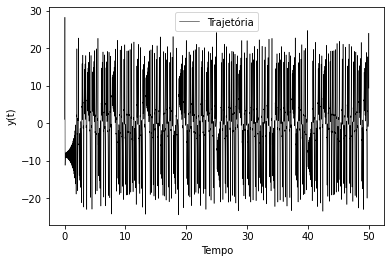

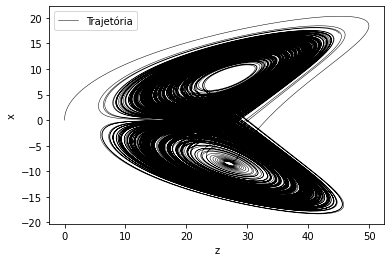

In [12]:
plt.plot(tpoints,ypoints,linewidth=0.5,color="black",label='Trajetória') #parte(a)
plt.xlabel('Tempo')
plt.ylabel('y(t)')
plt.legend()
plt.show()

plt.plot(zpoints,xpoints,linewidth=0.5,color="black",label='Trajetória') #parte(b)
plt.xlabel('z')
plt.ylabel('x')
plt.legend()
plt.show()

Em **(a)** é possível observar a imprevisibilidade do movimento e a falta de periodicidade. Em **(b)** vemos a famosa borboleta de Lorenz, um atrator estranho no retrato de fase desse sistema. Podemos ir além e observar o gráfico $x\times y\times z$. Essa imagem pode ser visualizada em: imgur.com/a/gpDVapA

Nessa imagem fica mais clara a figura formada pela trajetória no espaço de fase 3D. Essa forma em destaque é chamada também de borboleta de Lorenz.

Observe uma pequena simulação de $t=0$ até $t\approx 15$: imgur.com/qcHV12i

**CONCLUSÃO**

O sistema descrito pelas equações de Lorenz são determinísticos, isto é, segue as regras claras das equações diferenciais, porém não enxerga-se periodicidade e regularidade. Ao experimentar diferentes condições iniciais, nota-se que o sistema é muito sensível à essas condições. Esses fatores nos permitem concluir que as equações de Lorenz descrevem um sistema dinâmico **caótico**. O Efeito Borboleta descreve esse sistema dinâmico: "o bater de asas de uma borboleta no Brasil pode causar um tufão no Japão", mostrando que qualquer variação nas condições iniciais pode alterar o comportamento do sistema no tempo.